In [20]:
import pandas as pd
from pandas import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('data\email.csv',usecols=['Received','NumEmails'])
df["Received2"] =pd.to_datetime(df["Received"]).dt.normalize()
# df['dow']=pd.to_datetime(df.Received).dt.weekday.astype('str')

df.set_index('Received2',inplace=True)
df = df['2017-08-01':'2017-11-30'].groupby(['Received2'])['NumEmails'].sum()

# df['2017-10-01':'2017-10-31'].plot(figsize=(15,4));
# df['2017-11-01':'2017-11-30'].plot(figsize=(15,4));
# df['2017-12-01':'2017-12-31'].plot(figsize=(15,4));
print(df.head())

Received2
2017-08-01    26
2017-08-02    29
2017-08-03    22
2017-08-04    19
2017-08-05    15
Name: NumEmails, dtype: int64


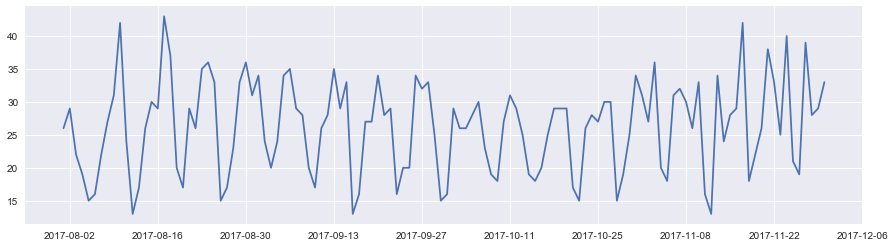

In [94]:
plt.figure(figsize=(15,4))  # must set before plot
plt.plot(df)
plt.show();

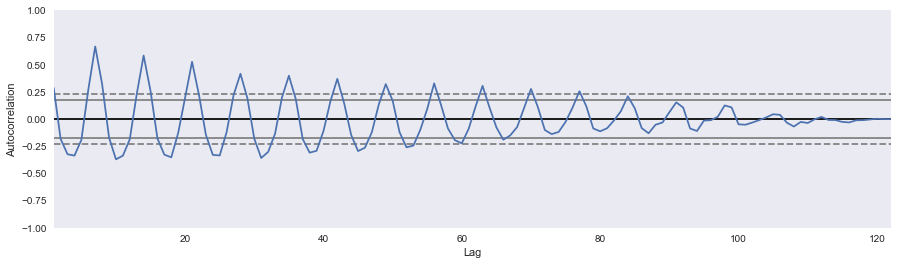

In [95]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,4))
autocorrelation_plot(df);

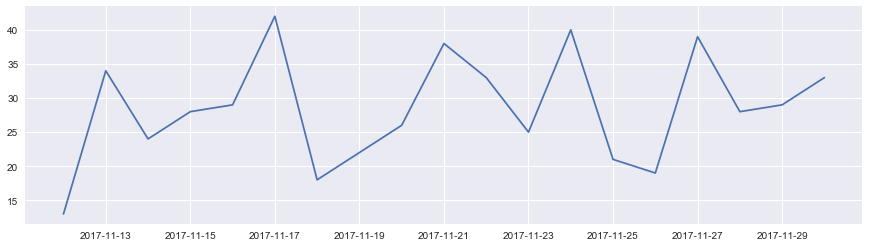

Std error 26.72%


In [138]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
#     X = X.astype('float32')
    train_size = int(len(X) * 0.85)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 7
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
#         print('predicted=%.0f, expected=%.0f' % (yhat, test[t]))
                
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return test, predictions, rmse

test, predictions, rmse = evaluate_arima_model(df.astype('float32'),(5, 1, 0))
plt.figure(figsize=(15,4))  # must set before plot
# plt.plot(predictions, color='red');
plt.plot(test)
plt.show();

if not math.isnan(rmse):
    print('Std error {:.2f}%'.format(rmse / np.mean(test) * 100))

train, test, history records = 103, 19, 103
predicted=19, expected=13
predicted=22, expected=34
predicted=34, expected=24
predicted=26, expected=28
predicted=30, expected=29
predicted=27, expected=42
predicted=26, expected=18
predicted=19, expected=22
predicted=22, expected=26
predicted=26, expected=38
predicted=25, expected=33
predicted=27, expected=25
predicted=21, expected=40
predicted=26, expected=21
predicted=17, expected=19
predicted=21, expected=39
predicted=30, expected=28
predicted=22, expected=29
predicted=26, expected=33


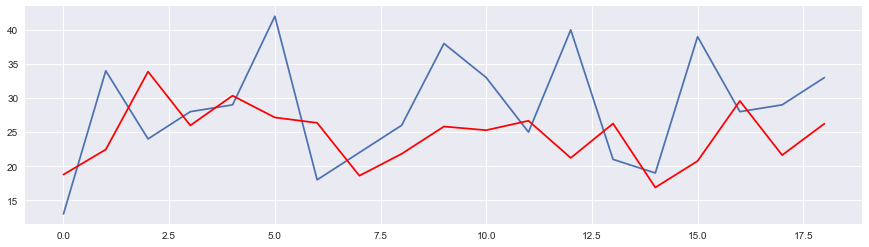

Wall time: 3.37 s


In [111]:
%%time
size = int(len(df.values) * 0.85)  
test = df.values[size:].astype('float32')  
train = df.values[0:size].astype('float32')

history = [x for x in train]   # store running values for moving avg based prediction

print("train, test, history records = {}, {}, {}".format(train.size,test.size,len(history)))

from statsmodels.tsa.arima_model import ARIMA
import math

predictions = list()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(5, 0, 0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)   
        obs = test[t]
        print('predicted=%.0f, expected=%.0f' % (yhat, obs))
        if math.isnan(obs) or math.isinf(obs):
            print('error:' % (obs))
        else:     
            history.append(obs)   # for arima to compute MOVING average
    except:
        print('catch t=%' % t)

plt.figure(figsize=(15,4))  # must set before plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print("Amt we're typically off:")
print('   Std error %.3f' % rmse)
if not math.isnan(rmse):
    print('   {:.2f}%'.format(rmse / np.mean(test) * 100))

Amt we're typically off:
   Std error 9.236
   32.44%


In [107]:
%%time
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 7
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = df.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=5.412
ARIMA(0, 0, 2) RMSE=5.441
ARIMA(0, 0, 3) RMSE=5.483
ARIMA(0, 0, 4) RMSE=5.317
ARIMA(0, 0, 5) RMSE=5.190
ARIMA(0, 0, 6) RMSE=5.198
ARIMA(0, 1, 1) RMSE=5.466
ARIMA(0, 2, 1) RMSE=8.085
ARIMA(1, 0, 0) RMSE=5.414
ARIMA(1, 1, 0) RMSE=7.026
ARIMA(1, 1, 1) RMSE=5.531
ARIMA(1, 1, 2) RMSE=5.614
ARIMA(1, 1, 3) RMSE=5.599
ARIMA(1, 1, 4) RMSE=5.410
ARIMA(1, 2, 0) RMSE=10.544
ARIMA(1, 2, 4) RMSE=5.672
ARIMA(2, 0, 0) RMSE=5.459
ARIMA(2, 0, 1) RMSE=5.501
ARIMA(2, 1, 0) RMSE=6.469
ARIMA(2, 1, 1) RMSE=5.547
ARIMA(2, 1, 2) RMSE=5.657
ARIMA(2, 1, 4) RMSE=5.283
ARIMA(2, 2, 0) RMSE=9.400
ARIMA(2, 2, 4) RMSE=5.576
ARIMA(3, 0, 0) RMSE=5.501
ARIMA(3, 0, 1) RMSE=5.477
ARIMA(3, 1, 0) RMSE=5.888
ARIMA(3, 1, 1) RMSE=6.066
ARIMA(3, 2, 0) RMSE=8.249
ARIMA(3, 2, 1) RMSE=5.925
ARIMA(3, 2, 3) RMSE=5.823
ARIMA(4, 0, 0) RMSE=5.453
ARIMA(4, 0, 1) RMSE=5.529
ARIMA(4, 0, 2) RMSE=5.436
ARIMA(4, 0, 3) RMSE=5.275
ARIMA(4, 1, 0) RMSE=5.764
ARIMA(4, 1, 1) RMSE=5.482
ARIMA(4, 1, 2) RMSE=5.520
ARIMA(4, 2,

In [ ]:
##difference of 12 month
ARIMA(0, 0, 1) RMSE=9.727
ARIMA(0, 0, 3) RMSE=9.442
ARIMA(0, 1, 1) RMSE=12.763
ARIMA(0, 1, 2) RMSE=9.744
ARIMA(0, 1, 3) RMSE=10.136
ARIMA(0, 2, 1) RMSE=13.159
ARIMA(1, 0, 0) RMSE=10.270
ARIMA(1, 0, 1) RMSE=9.834
ARIMA(1, 1, 0) RMSE=13.068
ARIMA(1, 2, 0) RMSE=18.792
ARIMA(2, 0, 0) RMSE=9.611
ARIMA(2, 0, 1) RMSE=9.421
ARIMA(2, 1, 0) RMSE=11.730
ARIMA(2, 2, 0) RMSE=15.640
ARIMA(3, 0, 0) RMSE=10.095
ARIMA(3, 0, 1) RMSE=9.647
ARIMA(3, 1, 0) RMSE=12.220
ARIMA(3, 2, 0) RMSE=14.993
ARIMA(4, 0, 0) RMSE=9.278
ARIMA(4, 0, 1) RMSE=8.937
ARIMA(4, 0, 2) RMSE=7.081
ARIMA(4, 1, 0) RMSE=12.230
ARIMA(4, 2, 0) RMSE=15.091
ARIMA(5, 0, 0) RMSE=8.132
ARIMA(5, 0, 1) RMSE=8.093
ARIMA(5, 1, 0) RMSE=9.115
ARIMA(5, 1, 1) RMSE=7.384
ARIMA(5, 1, 2) RMSE=6.911
ARIMA(5, 2, 0) RMSE=14.075
ARIMA(6, 0, 0) RMSE=8.086
ARIMA(6, 0, 1) RMSE=7.320
ARIMA(6, 0, 3) RMSE=6.616
ARIMA(6, 1, 0) RMSE=6.873
ARIMA(6, 1, 1) RMSE=6.777
ARIMA(6, 1, 4) RMSE=6.663
ARIMA(6, 2, 0) RMSE=10.017
ARIMA(6, 2, 3) RMSE=7.362
Best ARIMA(6, 0, 3) RMSE=6.616
Wall time: 15min 15s

In [ ]:
#differencing by 7
ARIMA(0, 0, 1) RMSE=5.412
ARIMA(0, 0, 2) RMSE=5.441
ARIMA(0, 0, 3) RMSE=5.483
ARIMA(0, 0, 4) RMSE=5.317
ARIMA(0, 0, 5) RMSE=5.190
ARIMA(0, 0, 6) RMSE=5.198
ARIMA(0, 1, 1) RMSE=5.466
ARIMA(0, 2, 1) RMSE=8.085
ARIMA(1, 0, 0) RMSE=5.414
ARIMA(1, 1, 0) RMSE=7.026
ARIMA(1, 1, 1) RMSE=5.531
ARIMA(1, 1, 2) RMSE=5.614
ARIMA(1, 1, 3) RMSE=5.599
ARIMA(1, 1, 4) RMSE=5.410
ARIMA(1, 2, 0) RMSE=10.544
ARIMA(1, 2, 4) RMSE=5.672
ARIMA(2, 0, 0) RMSE=5.459
ARIMA(2, 0, 1) RMSE=5.501
ARIMA(2, 1, 0) RMSE=6.469
ARIMA(2, 1, 1) RMSE=5.547
ARIMA(2, 1, 2) RMSE=5.657
ARIMA(2, 1, 4) RMSE=5.283
ARIMA(2, 2, 0) RMSE=9.400
ARIMA(2, 2, 4) RMSE=5.576
ARIMA(3, 0, 0) RMSE=5.501
ARIMA(3, 0, 1) RMSE=5.477
ARIMA(3, 1, 0) RMSE=5.888
ARIMA(3, 1, 1) RMSE=6.066
ARIMA(3, 2, 0) RMSE=8.249
ARIMA(3, 2, 1) RMSE=5.925
ARIMA(3, 2, 3) RMSE=5.823
ARIMA(4, 0, 0) RMSE=5.453
ARIMA(4, 0, 1) RMSE=5.529
ARIMA(4, 0, 2) RMSE=5.436
ARIMA(4, 0, 3) RMSE=5.275
ARIMA(4, 1, 0) RMSE=5.764
ARIMA(4, 1, 1) RMSE=5.482
ARIMA(4, 1, 2) RMSE=5.520
ARIMA(4, 2, 0) RMSE=7.673
ARIMA(4, 2, 1) RMSE=5.814
ARIMA(5, 0, 0) RMSE=5.487
ARIMA(5, 0, 1) RMSE=5.462
ARIMA(5, 0, 2) RMSE=5.520
ARIMA(5, 0, 3) RMSE=5.375
ARIMA(5, 0, 4) RMSE=5.050
ARIMA(5, 1, 0) RMSE=5.714
ARIMA(5, 1, 1) RMSE=5.442
ARIMA(5, 2, 0) RMSE=5.601
ARIMA(5, 2, 1) RMSE=5.619
ARIMA(6, 0, 0) RMSE=5.591
ARIMA(6, 1, 0) RMSE=5.213
ARIMA(6, 1, 1) RMSE=5.380
ARIMA(6, 2, 1) RMSE=5.256
Best ARIMA(5, 0, 4) RMSE=5.050
Wall time: 11min 27s